In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_data_cleaned.csv")

In [3]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


## EDA

In [4]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [5]:
df.shape

(1273, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

## No Null Values

In [25]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,ScreenSize,StorageCapacity
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946,290.769790,599.968578
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571,110.457643,475.128237
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000,132.392327,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000,220.290717,256.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000,272.539156,500.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000,324.787596,1000.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000,1248.314063,2512.000000


In [24]:
df.ScreenSize.unique()

array([ 310.96671641,  171.08843978,  262.65431643,  403.57836168,
        210.95480671,  449.89063269,  204.55566579,  251.76081944,
        186.84568594,  310.66639578,  208.3023034 ,  202.07118402,
        132.39232697,  353.02999521,  268.32403124,  269.71491634,
        231.04574068,  172.36521918,  265.47855639,  318.33918643,
        266.89067638,  184.69308587,  345.07967809,  331.2642361 ,
        161.18669313,  356.5398888 ,  296.54519597,  282.42399616,
        374.21179492,  352.71981856,  221.00027369,  407.47415863,
        324.78759559,  253.63352483,  154.67992826,  246.7918559 ,
        241.09120767,  300.78155592,  200.90933972,  309.42568921,
        267.49587065,  220.29071701,  254.18159655,  268.30279636,
        382.00702371,  251.45488504,  231.88496527,  343.80632134,
        235.06392748,  285.24823613,  256.4813348 ,  258.41795649,
        276.77551624,  200.41486284,  345.9693953 ,  196.68814019,
        248.44817708,  369.97543498,  228.57232291,  248.61380

In [18]:
a = [ 0,  500, 1000, 2000,   32,  128]

In [19]:
a.sort()
a

[0, 32, 128, 500, 1000, 2000]

In [83]:
df.corr()['Price']

Ram            0.680519
Weight         0.151386
Price          1.000000
TouchScreen    0.194289
Ips            0.279240
Ppi            0.480687
HDD           -0.097361
SSD            0.658808
Name: Price, dtype: float64

There is a notable positive correlation between the amount of RAM and the price of a product, indicating that as RAM increases, so does the price.

There is a slight positive correlation between weight and price, suggesting that laptops with greater weight might be associated with slightly higher prices.

There are positive correlations between features such as TouchScreen capability, IPS (In-Plane Switching) technology, and PPI (Pixels Per Inch) and the price of a product, indicating that superior display features are linked to higher prices

There is a robust positive correlation between the size of an SSD (Solid-State Drive) and the price of a product, signifying that increased SSD storage capacity is associated with higher prices.

There is a minor negative correlation between HDD (Hard Disk Drive) size and price, suggesting that larger HDD storage may lead to slightly lower prices.

Text(0, 0.5, 'Frequency')

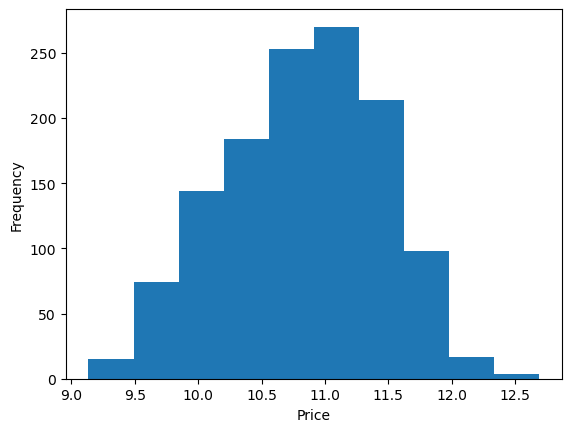

In [84]:
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')

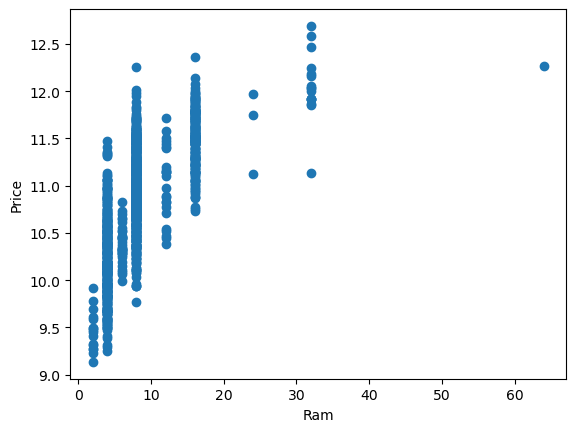

In [85]:
plt.scatter(df['Ram'],df['Price'])
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

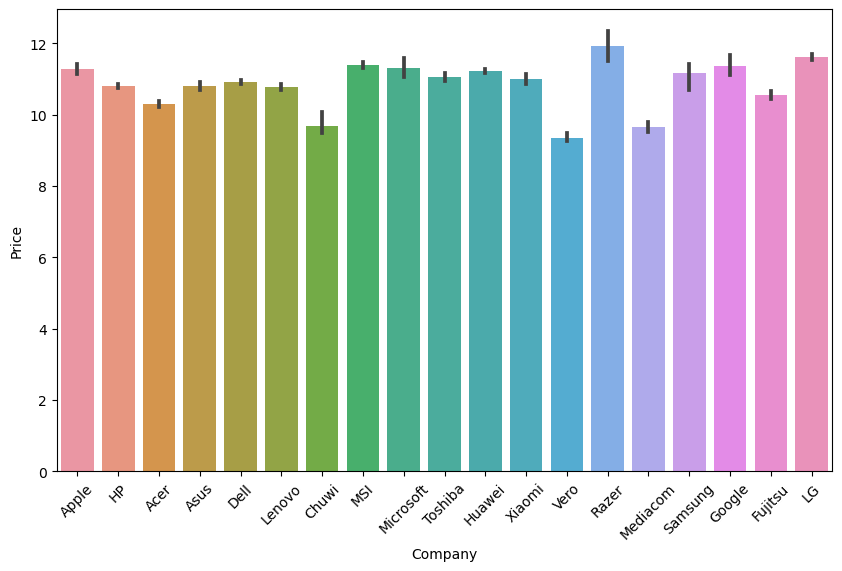

In [86]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Company')
plt.ylabel('Price')
plt.show()

In [23]:
# Extract relevant features
df['ScreenSize'] = df['Ppi'] * df['Weight']
df['StorageCapacity'] = df['HDD'] + df['SSD']

# # Encode categorical features
# df_encoded = pd.get_dummies(df, columns=['Company','TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os'])
# df_encoded.head()

In [88]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [89]:
obj = ['Company','TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os']
for col in obj:
    le = LabelBinarizer()
    df[col] = le.fit_transform(df[col])

In [90]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,ScreenSize,StorageCapacity
0,0,0,8,1.37,11.175755,0,1,226.983005,0,0,128,0,1,310.966716,128
1,0,0,8,1.34,10.776777,0,0,127.677940,0,0,0,0,1,171.088440,0
2,0,0,8,1.86,10.329931,0,0,141.211998,0,0,256,0,0,262.654316,256
3,0,0,16,1.83,11.814476,0,1,220.534624,0,0,512,1,1,403.578362,512
4,0,0,8,1.37,11.473101,0,1,226.983005,0,0,256,0,1,310.966716,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,0,0,4,2.20,10.555257,0,0,100.454670,0,500,0,0,0,221.000274,500
1269,0,1,4,1.80,10.433899,1,1,157.350512,0,0,128,0,0,283.230922,128
1270,0,1,16,1.30,11.288115,1,1,276.053530,0,0,512,0,0,358.869589,512
1271,0,0,2,1.50,9.409283,0,0,111.935204,0,0,0,0,0,167.902805,0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [92]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# X = df_encoded.drop('Price', axis=1)
# y = df_encoded['Price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

Linear Regression:

In [94]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mse_lr

0.12715886643395483

Decision Tree Regression

In [95]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_pred)

Random Forest Regression

In [96]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)

In [97]:
100-(mse_rf*100)

92.3356174666902

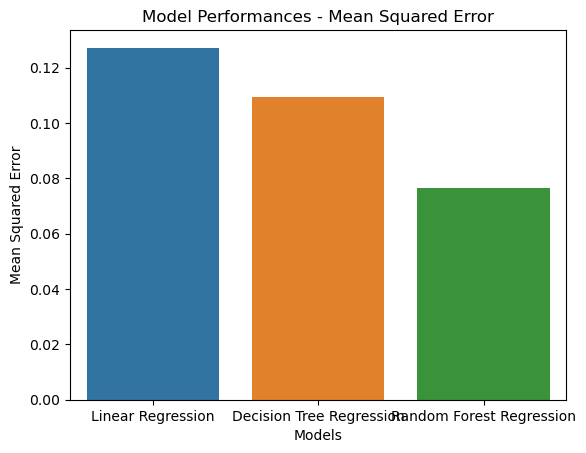

In [98]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_scores = [mse_lr, mse_dt, mse_rf]

sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performances - Mean Squared Error')

plt.show()

In [99]:
import pandas as pd 
df = pd.read_csv("laptop_data_cleaned.csv")

# Extract relevant features
df['ScreenSize'] = df['Ppi'] * df['Weight']
df['StorageCapacity'] = df['HDD'] + df['SSD']

In [106]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,ScreenSize,StorageCapacity
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,310.966716,128
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,171.088440,0
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,262.654316,256
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,403.578362,512
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,310.966716,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows,221.000274,500
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,283.230922,128
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,358.869589,512
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,167.902805,0


In [36]:
# df_encoded = pd.get_dummies(df, columns=['Company','TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os'])

In [101]:
# df.to_csv('cleaned_Laptop_Data.csv')

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn_pandas import DataFrameMapper

In [107]:
m = DataFrameMapper([(["Company",LabelBinarizer()]),(["TypeName",LabelBinarizer()]),
                     (["TouchScreen",LabelBinarizer()]),(["Cpu_brand",LabelBinarizer()]),
                     (["Gpu_brand",LabelBinarizer()]),(["Os",LabelBinarizer()])
                ])

In [108]:
regressor = []
regressor.append(("mapper",m))
regressor.append(('standardize', StandardScaler()))
regressor.append(("model",RandomForestRegressor()))

In [109]:
X = df.drop('Price', axis=1)
y = df['Price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
model = Pipeline(regressor)
model.fit(X,y)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['Company', LabelBinarizer()],
                                           ['TypeName', LabelBinarizer()],
                                           ['TouchScreen', LabelBinarizer()],
                                           ['Cpu_brand', LabelBinarizer()],
                                           ['Gpu_brand', LabelBinarizer()],
                                           ['Os', LabelBinarizer()]])),
                ('standardize', StandardScaler()),
                ('model', RandomForestRegressor())])

In [111]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,ScreenSize,StorageCapacity
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,310.966716,128
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,171.088440,0
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,262.654316,256
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,403.578362,512
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,310.966716,256


In [112]:
dict(df.iloc[4,:])

{'Company': 'Apple',
 'TypeName': 'Ultrabook',
 'Ram': 8,
 'Weight': 1.37,
 'Price': 11.473100972779063,
 'TouchScreen': 0,
 'Ips': 1,
 'Ppi': 226.98300468106115,
 'Cpu_brand': 'Intel Core i5',
 'HDD': 0,
 'SSD': 256,
 'Gpu_brand': 'Intel',
 'Os': 'Mac',
 'ScreenSize': 310.9667164130538,
 'StorageCapacity': 256}

In [113]:
new = {'Company': 'Apple',
 'TypeName': 'Ultrabook',
 'Ram': 8,
 'Weight': 1.37,
 'Price': 11.473100972779063,
 'TouchScreen': 0,
 'Ips': 1,
 'Ppi': 226.98300468106115,
 'Cpu_brand': 'Intel Core i5',
 'HDD': 0,
 'SSD': 256,
 'Gpu_brand': 'Intel',
 'Os': 'Mac',
 'ScreenSize': 310.9667164130538,
 'StorageCapacity': 256}

In [114]:
data = pd.DataFrame(new,index=[0])

In [115]:
data

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,ScreenSize,StorageCapacity
0,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,310.966716,256


In [116]:
model.predict(data)

array([11.16664586])